In [9]:
# import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as integrate
from scipy.integrate import quad
import math
e=[0 for i in range(10000)]
cnt=0
INTERVAL=0.1
LEFT=0
RIGHT=600
m = 1 # kg
k=0.00324844 # kg/m
F = 12.2 # N/kg
g = 9.8 # m/s^2
eps = 0.4
u = 0.6
r = 0.75 # m
maxp = 200
#theta = 10
th = 0
sigma = 41.5
tou = 1.06
time=[0 for i in range(10000)]
E0=float(input('Please input the initial energy: '))
m=float(input('Please input the total mass of the athlete and the bicycle: '))
n=int(input('Please input the number of slopes: '))
l=[0 for i in range(10000)]
thet=[0 for i in range(10000)]
t=np.arange(LEFT,RIGHT,INTERVAL)
#energy_final = [energy[i]+E0 for i in range(len(t))]
A=F-(m*g*u)/(r)-m*g*(math.sin(math.pi*th/180.00))
#A=-A
def integrand(t):
    return ((math.sqrt(A)*np.tanh( (t*math.sqrt(A*k))/m ))/(math.sqrt(k))+v0) # v-t 函数（倍积函数）
def find_first_zero(theta):
    for i in range(len(t)-2):
        if(energy_final[i]*energy_final[i+1]<=0):
            return round(i*INTERVAL,2)
        else:
            continue
INF = 999999
def get_A(theta):
    return (F-(m*g*u)/(r)-m*g*(math.sin(math.pi*theta/180.00)))
def getMaxSpeed(theta): # theta 角时的最大速度
    AAA=get_A(theta)
    return (math.sqrt(AAA)*np.tanh( (INF*math.sqrt(AAA*k))/m ))/(math.sqrt(k))
v0=0
energy_final=[0 for i in range(5000)]
def velocity(v,t):
    dvdt = ( F-k*(v**2)-(m*g*miu)/(r)-m*g*(math.sin(math.pi*th/180.00)) )/m
    return dvdt

def integrand(t):
    return ((math.sqrt(A)*np.tanh( (t*math.sqrt(A*k))/m ))/(math.sqrt(k))+v0)
def with_bonds(a,b):
    inte=quad(integrand,a,b)
    return inte[0]
    
#integral_result = [0 for i in range(len(t))]
#for i in range(len(t)):
#    integral_result[i] = with_bonds(0,t[i])

energy = [0 for i in range(len(t))]
#for i in range(len(t)):
#    energy[i] = sigma*t[i] - eps*F*integral_result[i]

for i in range(n):
    print('Please enter the length of track number ',end='')
    print(i+1,end=': ')
    l[i]=float(input())
    print('Please enter the slope of track number ',end='')
    print(i+1,end=': ')
    thet[i]=float(input())
def find_root_energy(energ):
    for i in range(len(t)-2):
        if (energy_final[i]-energ)*(energy_final[i+1]-energ)<0:
            return round(i*INTERVAL,2)
        else:
            continue
#t=find_root_energy(2000)
#print(t)
#dis_t = with_bonds(0.0,t)
#print(dis_t)

Please input the initial energy: 2403.5
Please input the total mass of the athlete and the bicycle: 1
Please input the number of slopes: 1
Please enter the length of track number 1: 2000
Please enter the slope of track number 1: 4


In [22]:
t=np.arange(LEFT,RIGHT,INTERVAL)
cnt=0
print(A)
for i in range(n):
    if i==0:
        energy_final[0]=E0
    else:
        energy_final[0]=energy_final[int(time[i-1]/INTERVAL)]
    print(energy_final[0])
    if thet[i]>=-4:
        y=[0 for i in range(100000)]
        x=[0 for i in range(100000)]
        th=thet[i]
        A=F-(m*g*u)/(r)-m*g*(math.sin(math.pi*th/180.00))
        v22=v0+0.1
    #     j=0.0
        v114514=getMaxSpeed(thet[i])
        s_a=0.0
        t114514=0.0
        Flg=False
#        print('--------------------------------------')
        for i in range(1,5000):
            t114514+=INTERVAL
            energy_final[i]=energy_final[i-1]-INTERVAL*F*v22
            v22=math.sqrt((m*(v22**2)+A*INTERVAL*v22)/m)
#            print(v22)
            if(v22>=v114514):
                Flg=True
                break
        t1=t114514
#        vv=getMaxSpeed(thet[i])
#        t1=1.5
#        t1=find_root_energy(energy_final[0]) # 加速时间
        print(t1)
#        t3=t1/2 # 减速时间
        s_a=with_bonds(0,t1)
        analytical = [0 for i in range(100000)]
        for j in range(len(t)):
            analytical[j] = (math.sqrt(A)*np.tanh( (t[j]*math.sqrt(A*k))/m ))/(math.sqrt(k))+v0
        if s_a>=l[i]:
            lef_t=0.0
            rig_t=t1
            print('------------------------------------------------')
            while rig_t-lef_t>INTERVAL:
                mid=(lef_t+rig_t)/2
                print(mid)
                if with_bonds(0,mid)>l[i]:
                    rig_t=mid
                else:
                    lef_t=mid
            time[i]=(rig_t+lef_t)/2
            for i in range(int(time[i]/INTERVAL)+1):
                energy_final[i]=energy_final[i-1]+sigma-maxp
                e[cnt]=energy_final[i]
                cnt+=1
                print(cnt,end='*\n')
            v0=analytical[int(time[i]/INTERVAL)]
        else:
            flag=True # 记录在斜坡上体力是否会耗尽
            flag2=False # 记录斜坡是否走完
            vv=analytical[int(t1/INTERVAL)]
            for i in range(int(t1/INTERVAL)+1):
                energy_final[i]=energy_final[i-1]+sigma-maxp
                e[cnt]=energy_final[i]
                cnt+=1
                print(cnt,end='*\n')
            s_left=l[i]-s_a
            for j in range(int(t1/INTERVAL)+1,5000):
                energy_final[j]=energy_final[j-1]+sigma-vv*(k*vv*vv+m*g*u/r)
                e[cnt]=energy_final[i]
                cnt+=1
                print(cnt,end='*\n')
                s_left-=vv*INTERVAL
                if s_left<=0:
                    time[i]=j*INTERVAL
                    flag2=True
                    break
                if energy_final[j]<=0:
                    t_a_0=i*INTERVAL
                    flag=False
                    break
            if flag2:
                v0=vv
                continue
            if flag==0:
                time[i]=t_a_0
                for j in range(int(t_a_0/INTERVAL)+1,5000):
                    t[i]+=INTERVAL
                    energy_final[j]=energy_final[j-1]+sigma
                    e[cnt]=energy_final[i]
                    cnt+=1
                    print(cnt,end='*\n')
                    s_left-=INTERVAL*math.sqrt((vv*vv-sigma*tou)*math.exp(-2*(j-t_a_0+2.5)/tou/2.5)+sigma*tou)
    else:
        y=[0 for i in range(100000)]
        x=[0 for i in range(100000)]
        th=theta[i]
        A=-(m*g*u)/(r)-m*g*(math.sin(math.pi*th/180.00))
    #     j=0.0
        s_a=0.0
        t1=find_root_energy(E0) #占位 加速时间
        t3=t1/2 # 减速时间
        s_a=with_bonds(0,t1)
        analytical = [0 for i in range(100000)]
        analytical[0]=v0
        for j in range(1,len(t)):
            analytical[j] = analytical[j-1]+INTERVAL*A/m
        acce=A/m
        time[i]=math.sqrt(v0**2+2*acce*l[i])-v0
        v0+=acce*time[i]
        energy_final[int(time[i]/INTERVAL)+1]=energy_final[0]+time[i]*sigma
        e[cnt]=energy_final[i]
        cnt+=1
        print(cnt,end='*\n')
#         for j in range(int(t[i]/INTERVAL)+1):
#             if s_a>=l[i]:
#                 lef_t=0.0
#                 rig_t=t1
#                 while rig_t-lef_t>INTERVAL:
#                     mid=(lef_t+rig_t)/2
#                 if with_bonds(0,mid)>l[i]:
#                     rig_t=mid
#                 else:
#                     lef_t=mid
#                 t[i]=(rig_t+lef_t)/2
#                 for i in range(int(t[i]/INTERNAL)+1):
#                     energy_final[i]=energy_final[i-1]+sigma
#                     e[cnt]=energy_final[i]
#                     cnt+=1
#                 v0=analytical[int(t[i]/INTERVAL)]
#             else:
#                 flag=True # 记录在斜坡上体力是否会耗尽
#                 flag2=False # 记录斜坡是否走完
#                 vv=analytical[int(t1/INTERVAL)]
#                 for i in range(int(t1/INTERVAL)+1):
#                     energy_final[i]=energy_final[i-1]+sigma-maxp
#                     e[cnt]=energy_final[i]
#                     cnt+=1
#                 s_left=l[i]-s_a
#                 for j in range(int(t1/INTERNAL)+1,114514):
#                     energy_final[j]=energy_final[j-1]+sigma-vv*(k*vv*vv+m*g*u/r)
#                     e[cnt]=energy_final[i]
#                     cnt+=1
#                     s_left-=vv*INTERVAL
#                     if s_left<=0:
#                         t[i]=j*INTERVAL
#                         flag2=True
#                         break
#                     if energy_final[j]<=0:
#                         t_a_0=i*internal
#                         flag=False
#                         break
#                 if flag2:
#                     v0=vv
#                     continue
#                 if flag==0:
#                     t[i]=t_a_0
#                     for j in range(int(t_a_0/INTERVAL)+1,114514):
#                         t[i]+=INTERVAL
#                         energy_final[j]=energy_final[j-1]+sigma
#                         e[cnt]=energy_final[i]
#                         cnt+=1
#                         s_left-=INTERVAL*math.sqrt((v2*v2-sigma*tou)*math.exp(-2*(j-t2+2.5)/tou/2.5)+sigma*tou)

            #y[i]=math.sqrt((v2*v2-sigma*tou)*math.exp(-2*(dx[i]-t2+2.5)/tou/2.5)+sigma*tou)
#        t_a_0=find_first_zero(theta[i])
#        t_12=t_a_0-t1
#        ss=vv*t_12
#        if(ss>=s_left):
#             匀速时此斜坡结束
#            v0=vv
#            t[i]=t1+s_left/vv
#            for i in range(int(t1/INTERNAL)+1,int(t[i]/INTERNAL)+1):
#                energy_final[i]=energy_final[i-1]+sigma-vv*(k*vv*vv+m*g*u/r)
#        else:
#            E0=0
            # 进入减速阶段
    # print(s)
    # 不妨令 t1=2t3（？）
    #    print('.')

3.6763865573075716
2403.5
18.599999999999994
------------------------------------------------
9.299999999999997
4.649999999999999
2.3249999999999993
1.1624999999999996
0.5812499999999998
0.2906249999999999
0.14531249999999996
0.07265624999999998
1*


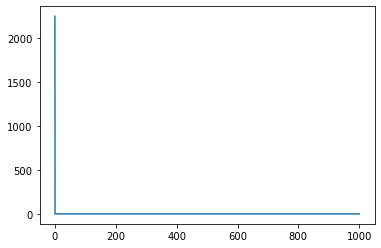

In [17]:
xxxxx=[0 for i in range(10000)]
for i in range(len(e)):
    xxxxx[i]=(i+1)*INTERVAL
plt.plot(xxxxx,e)
plt.show()

In [19]:
tot=0
for i in range(len(e)):
    if e[i]!=0:
        tot+=1
print(tot)

1
